# Analysing work effort in Denmark compared to other OECD countries

**Table of contents**<a id='toc0_'></a>    
- 0. [Imports](#toc1_) 
- 1. [Read and clean data](#toc2_)    
- 2. [Explore each data set](#toc3_)   
- 3. [Merge datasets](#toc4_)   
- 4. [Analysis](#toc5_) 
- 5. [Conclusion](#toc6_) 


<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[0. Imports](#toc0_)

Imports and set magics:

In [89]:
#pip install pandasdmx
#pip install geopandas

In [90]:
import pandas as pd
import pandasdmx as pdmx
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import geopandas as gpd
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from IPython.display import HTML

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## <a id='toc2_'></a>[1. Read and clean data](#toc0_)

In this data project we investigate the total work effort in Denmark. Specifically, we examine how the working hours per person employed in OECD countries have evolved over time, with a special focus on Denmark's position relative to others. Additionally, we explore the relationship between employment rates and working hours per person employed across OECD countries. 

The two used datasets for the analysis is imported from the OECD database (https://data.oecd.org). Both datasets contain annual data from 2008 to 2022. We employ the following datasets:
-  **Level of GDP per capita and productivity - Average hours worked per person employed:** The dataset contains data on average hours worked per person employed measured as hours per year in OECD countries. 
- **Short-Term Labour Market Statistics - Employment Rate:** The dataset contains data on employment rates measured as the percentage of 15-64 year olds who are employed in each OECD country. The dataset contains employment rates for females, males and all. 

Importing and cleaning data on employment rates:

In [91]:
# Fetching and cleaning data
emplrate = dataproject.fetching_data_emplrate()
emplrate

,LOCATION,SUBJECT,YEAR,EMPLRATE
0,AUS,Female,2008,66.72
1,AUS,Female,2009,66.30
2,AUS,Female,2010,66.15
3,AUS,Female,2011,66.65
4,AUS,Female,2012,66.57
...,...,...,...,...
1693,CRI,All,2018,60.95
1694,CRI,All,2019,61.65
1695,CRI,All,2020,54.83
1696,CRI,All,2021,57.15


Importing and cleaning data on average hours worked per person employed:

In [92]:
# Fetching and cleaning data
hours = dataproject.fetching_data_hours()
hours

,LOCATION,YEAR,AVHRS
0,AUS,2008,1753.56
1,AUS,2009,1779.14
2,AUS,2010,1755.15
3,AUS,2011,1771.54
4,AUS,2012,1759.61
...,...,...,...
562,COL,2018,2385.94
563,COL,2019,2382.61
564,COL,2020,2069.44
565,COL,2021,2405.39


## <a id='toc3_'></a>[2. Explore each data set](#toc0_)

To get a quick overview of the data we show some summary statistics for each OECD country across all years with a drop down menu to select the country of interest:

In [93]:
# Create a table of descriptive statistics
dataproject.table(emplrate, hours)

interactive(children=(Dropdown(description='Country:', options=('AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN…

The hours worked statistics has no gender divided information so the gender dropdown menu only works for the employment rate.

To further get a look at the data we create an interactive plot that illustrates the employments rates of 2022 across OECD countries with a drop down menu that enables the graph to show employment rates for males, females and all, respectively. This shows which countries are included in the 'emplrate' dataset and indicates the current differences in employment rates across OECD countries:

In [94]:
# Create a world map showing employment rates in OECD countries
dataproject.worldmapemp(emplrate)

/Users/claraengelund/Desktop/Programmer/projects-2024-clara-og-theis/dataproject/dataproject.py:131: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


interactive(children=(Dropdown(description='Gender:', options=('All', 'Male', 'Female'), value='All'), Output(…

Another world map illustrates the average hours worked per person employed in 2022 across OECD countries. This shows which countries are included in the 'hours' dataset and indicates the differences in working hours across OECD countries:

/Users/claraengelund/Desktop/Programmer/projects-2024-clara-og-theis/dataproject/dataproject.py:157: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


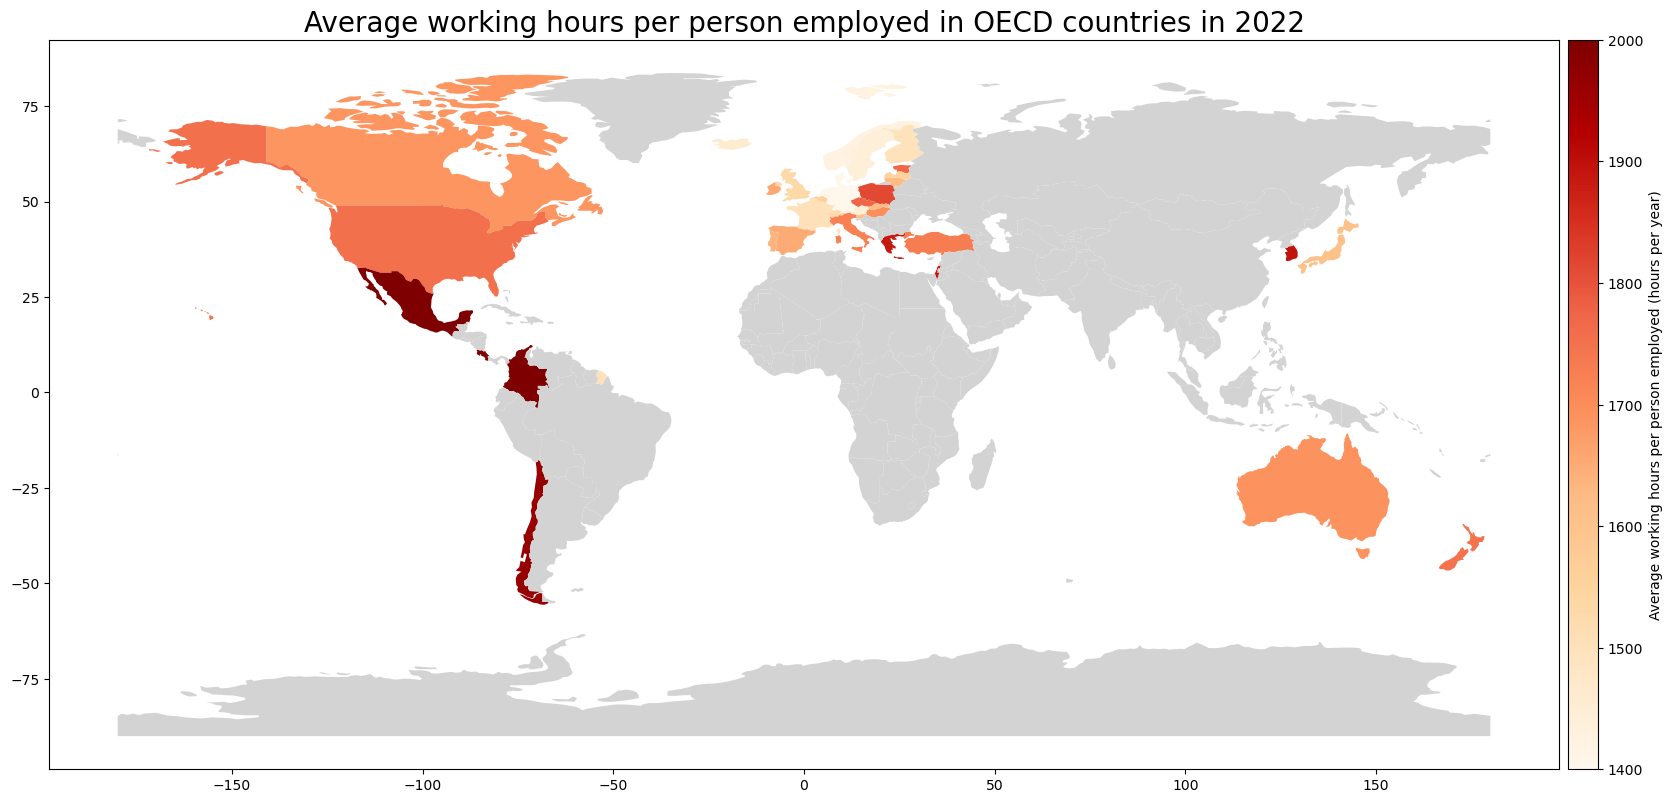

In [95]:
# Create a world map showing average working hours in OECD countries
dataproject.worldmaphours(hours)

The hours worked and employment rate seems to be inversely correlated across countries which we will explore further below. 

## <a id='toc4_'></a>[3. Merge datasets](#toc0_)

Merge the datasets on employment rates and average hours per person employed in OECD countries. We do a many-to-one inner merge because we want to include employment rates for females, males and all even though this specification does not exist for the 'hours' dataset but we only want to keep observations where both an employment rate and average working hours exists:

In [96]:
# Merge the two datasets
data_merged = pd.merge(emplrate,hours,how='inner',on=['LOCATION','YEAR'])
data_merged

,LOCATION,SUBJECT,YEAR,EMPLRATE,AVHRS
0,AUS,Female,2008,66.72,1753.56
1,AUS,Male,2008,79.68,1753.56
2,AUS,All,2008,73.20,1753.56
3,AUS,Female,2009,66.30,1779.14
4,AUS,Male,2009,77.79,1779.14
...,...,...,...,...,...
1684,CRI,Male,2021,70.10,2080.56
1685,CRI,All,2021,57.15,2080.56
1686,CRI,Female,2022,47.07,2155.73
1687,CRI,Male,2022,72.86,2155.73


## <a id='toc5_'></a>[4. Analysis](#toc0_)

To be able to compare the development in average hours worked per person employed over time for the OECD countries we compute an index with 2008 as the baseline:

In [97]:
# Create an index for average hours worked per person employed
dataproject.index(data_merged)
data_merged.head()

,LOCATION,SUBJECT,YEAR,EMPLRATE,AVHRS,baseline_avhrs,AVHRS_index
0,AUS,Female,2008,66.72,1753.56,1753.56,100.00
1,AUS,Male,2008,79.68,1753.56,1753.56,100.00
2,AUS,All,2008,73.20,1753.56,1753.56,100.00
3,AUS,Female,2009,66.30,1779.14,1753.56,101.46
4,AUS,Male,2009,77.79,1779.14,1753.56,101.46


We plot the indexed average hours worked per person employed over time for each of the OECD countries to get an idea of how the working hours have evolved across time. A checkbox makes it possible to include several countries in the graph and compare the developments:

In [98]:
# Plot indexed average working hours across time
dataproject.plotacrosstime(data_merged)

interactive(children=(Checkbox(value=True, description='AUS'), Checkbox(value=True, description='AUT'), Checkb…

There is a general trend in OECD countries where working hours per person employed have declined in the period 2008-2022. This is also the case for Denmark. Though COVID-19 creates some noise in the graph around 2020 there is a general negative trend. This may raise some concern about the total work effort in Denmark.

In a scatter plot the employment rate is plotted against the average hours worked in 2022 for all OECD countries:

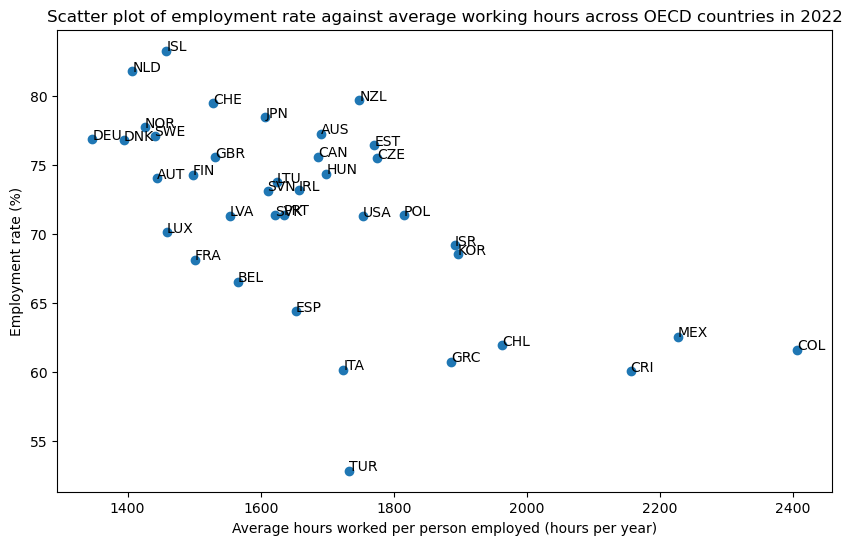

In [99]:
# Create a scatter plot of employment rates against average working hours
dataproject.scatterplot(data_merged)

The graph shows that Denmark ranks very low when it comes to working hours per person employed. At the same time relatively many danes between 15 and 64 years is in employment compared to other OECD countries.

A bar chart compares the employment rates in 2022 of OECD countries and highlights the rank of Denmark. A drop down menu enables the plot to show employment rates for males and females:

In [100]:
# Plotting a bar chart of the male and female employment rates in 2022
dataproject.barchart(data_merged)

interactive(children=(Dropdown(description='Gender:', index=1, options=('Male', 'Female'), value='Female'), Ou…

The female employment rate is especially large in Denmark compared to the other OECD countries. 

## <a id='toc6_'></a>[5. Conclusion](#toc0_)

Our analysis shows that average working hours per person employed has decreased across time for most of the OECD countries. 
Specifically, Denmark ranks as one of the OECD countries with the lowest average working hours per person employed in 2022. However, the employment rate in Denmark in 2022 is quite large compared to a lot of the other OECD countries. This is, among other things, because the female employment rate in Denmark is relatively large. Thus we cannot conclude anything umambiguous about the total work effort in Denmark. 